In [ ]:
import os

import h5py
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt


f = h5py.File('/home/fernando/Documentos/ca1data20191017/sonata/edges/edges.h5', 'r') # 2.4 Gb not in github
f1 = h5py.File('../info/data-bbp/20191017/sonata/nodes/nodes.h5', 'r')
f2 = h5py.File('../info/gdrive/connhipp_mc2r100.h5', 'r')

mtypes = ['SLM_PPA','SO_BP','SO_BS','SO_OLM','SO_Tri','SP_AA','SP_BS','SP_CCKBC','SP_Ivy','SP_PC','SP_PVBC','SR_SCA']

for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical'][itens]))

print('\n0')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][itens]))

print('\nindices[source_to_target]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target'][itens]))
    
print('\nindices[target_to_source]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source'][itens]))


syn_type_id = np.array(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']['syn_type_id'])

histog = plt.hist(syn_type_id, bins=500)

listofsyntypes = []
synNumber = {}

number = 0
for i,y in enumerate(histog[0]):
    if y>0:
        number += y
        print('%d [%.1f %.1f] %d %d' % (int(histog[1][1+i]),histog[1][i],histog[1][1+i],y,number))
        listofsyntypes.append(int(histog[1][1+i]))
        synNumber[int(histog[1][1+i])] = int(y)

conductance = []
conductance.append(np.array(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']['conductance'])[np.where(syn_type_id==4)])
histg = plt.hist(conductance, bins=200)

syns_mtypes = {}
for j in listofsyntypes:
    syns_mtypes[j] = []

for j in listofsyntypes[15:]:
    if synNumber[j] > 100000:
        maxconn = 100000
    else:
        maxconn = synNumber[j]
        
    print(j,maxconn,synNumber[j])

    for i in list([np.where(syn_type_id==j)])[0][0][0:maxconn]:
        source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
        target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]

        pre_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]]
        post_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][target_id]]
        if pre_mtype + ':' + post_mtype not in syns_mtypes[j]:
            syns_mtypes[j].append(pre_mtype + ':' + post_mtype)

In [ ]:
syns_mtypes =
{4: ['SLM_PPA:SP_PC'],
 5: ['SO_OLM:SP_PC', 'SO_Tri:SP_PC', 'SO_BS:SP_PC', 'SO_BP:SP_PC'],
 6: ['SP_Ivy:SP_PC'],
 7: ['SO_OLM:SLM_PPA',
  'SO_BS:SLM_PPA',
  'SR_SCA:SLM_PPA',
  'SP_Ivy:SLM_PPA',
  'SP_BS:SLM_PPA',
  'SO_BP:SLM_PPA',
  'SP_PVBC:SR_SCA',
  'SP_CCKBC:SR_SCA',
  'SP_BS:SR_SCA',
  'SP_Ivy:SR_SCA',
  'SO_OLM:SR_SCA',
  'SO_Tri:SR_SCA',
  'SO_BP:SR_SCA',
  'SO_BS:SR_SCA',
  'SLM_PPA:SR_SCA',
  'SR_SCA:SP_PVBC',
  'SP_CCKBC:SP_PVBC',
  'SP_BS:SP_PVBC',
  'SP_Ivy:SP_PVBC',
  'SO_OLM:SP_PVBC',
  'SO_BS:SP_PVBC',
  'SO_Tri:SP_PVBC',
  'SO_BP:SP_PVBC',
  'SLM_PPA:SP_PVBC'],
 8: ['SLM_PPA:SLM_PPA', 'SR_SCA:SR_SCA', 'SP_CCKBC:SP_CCKBC'],
 13: ['SP_PVBC:SP_PC'],
 14: ['SP_AA:SP_PC'],
 15: ['SP_BS:SP_PC'],
 16: ['SP_CCKBC:SP_PC'],
 17: ['SR_SCA:SP_PC'],
 18: ['SP_PVBC:SP_PVBC'],
 19: ['SP_PVBC:SP_AA'],
 100: ['SP_PC:SP_PC'],
 101: ['SP_PC:SO_OLM'],
 102: ['SP_PC:SR_SCA', 'SP_PC:SP_AA'],
 109: ['SP_PC:SP_PVBC'],
 110: ['SP_PC:SP_CCKBC'],
 111: ['SP_PC:SP_BS'],
 112: ['SP_PC:SP_Ivy']}


In [101]:
syns_mtypes

{4: ['SLM_PPA:SP_PC'],
 5: ['SO_OLM:SP_PC', 'SO_Tri:SP_PC', 'SO_BS:SP_PC', 'SO_BP:SP_PC'],
 6: ['SP_Ivy:SP_PC'],
 7: [],
 8: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 100: [],
 101: [],
 102: [],
 109: [],
 110: [],
 111: [],
 112: []}

In [ ]:
projs = np.unique(proj_mtypes)
proj_mtypes = np.array(proj_mtypes)

conductance = []
conductance_std = []

decay_time = []
decay_time_std = []

u_syn = []
u_syn_std = []

depression_time = []
depression_time_std = []

facilitation_time = []
facilitation_time_std = []

delay = []

n_rrp_vesicles = []


for proj in projs:
  conductance.append(np.mean(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
  conductance_std.append(np.std(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
  
  decay_time.append(np.mean(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))
  decay_time_std.append(np.std(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))

  u_syn.append(np.mean(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
  u_syn_std.append(np.std(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
  
  depression_time.append(np.mean(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))
  depression_time_std.append(np.std(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))

  facilitation_time.append(np.mean(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))
  facilitation_time_std.append(np.std(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))

  delay.append(np.mean(np.array(parameters['edges']['delay'])[np.where(proj_mtypes==proj)[0]]))

  n_rrp_vesicles.append(np.mean(np.array(parameters['edges']['n_rrp_vesicles'])[np.where(proj_mtypes==proj)[0]]))

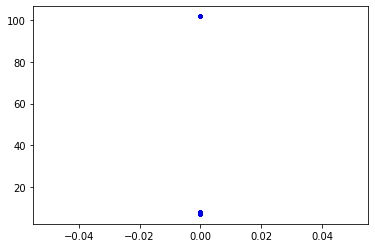

In [17]:
nn = 73587
plt.plot(list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']['synapse_type_id'][0:nn]),list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']['syn_type_id'][0:nn]),'.b')

Fernando


In [ ]:
pre = str(connCa1['edges']['source_node_id'][0])
post = str(connCa1['edges']['target_node_id'][0])
connNumber = 0
connList = {}
connList[connNumber] = []
connList[connNumber].append(str(connCa1['edges']['source_node_id'][0]))
connListpost = []
connListpost.append(str(connCa1['edges']['target_node_id'][0]))

for synID in range(1,133352):
  if pre == str(connCa1['edges']['source_node_id'][synID]) and post == str(connCa1['edges']['target_node_id'][synID]):
    connList[connNumber].append(str(connCa1['edges']['source_node_id'][synID]))
  else:
    connNumber+=1
    connList[connNumber] = []
    connList[connNumber].append(str(connCa1['edges']['source_node_id'][synID]))
    connListpost.append(str(connCa1['edges']['target_node_id'][synID]))

    if pre in Epops:
      netParams.synMechParams['synMech_' + pre + '_' + post] = {'mod': 'DetAMPANMDA', 
                                                'tau_d_AMPA':connCa1['edges']['decay_time'][synID],
                                                'Use': connCa1['edges']['u_syn'][synID], 
                                                'Dep': connCa1['edges']['depression_time'][synID], 
                                                'Fac': connCa1['edges']['facilitation_time'][synID]}

    else:
      netParams.synMechParams['synMech_' + pre + '_' + post]={'mod':'DetGABAAB', 
                                        'tau_d_GABAA':connCa1['edges']['decay_time'][synID],
                                        'Use': connCa1['edges']['u_syn'][synID], 
                                        'Dep': connCa1['edges']['depression_time'][synID], 
                                        'Fac': connCa1['edges']['facilitation_time'][synID]} 

  pre = str(connCa1['edges']['source_node_id'][synID])
  post = str(connCa1['edges']['target_node_id'][synID])

In [ ]:
connNumber

24647

In [ ]:
connNumber = 0
synID = 0

for connID in range(24647):
    pre = connList[connNumber][0]
    post = connListpost[connNumber]
        
    netParams.connParams['connID_' + pre + '_' + post] = {        
        'preConds': {'pop': pre},
        'postConds': {'pop': post},
        'synsPerConn': np.size(connList[connNumber]),
        'sec': connCa1['edges']['efferent_section_id'][synID:synID+np.size(connList[connNumber])], # se não der certo -> connCa1['edges']['efferent_section_id'][synID]
        'synMech': 'synMech_' + pre + '_' + post,
        'weight': connCa1['edges']['conductance'][synID:synID+np.size(connList[connNumber])],
        'delay': connCa1['edges']['delay'][synID:synID+np.size(connList[connNumber])]
        }
    connNumber+=1
    synID+=np.size(connList[connNumber])


In [ ]:
for synID in range(133352):
    netParams.connParams['synID_' + str(synID)] = {
        
        pre = connCa1['edges']['source_node_id'][synID]
        post = connCa1['edges']['target_node_id'][synID]
        
        preMype = str(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][pre]])
        preMype = preMype[2:-1]        
        postMype = str(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][post]])
        postMype = postMype[2:-1]
        
        'preConds': {'pop': str(pre)},
        'postConds': {'pop': str(post)},
        'sec': connCa1['edges']['efferent_section_id'],
        'synsPerConn': 1,
        'synMech': matrix['synTape'][preMype][postMype],
        'weight': connCa1['edges']['conductance'],
        'delay': connCa1['edges']['delay']
        }



---



# Synapses Per Connection

In [57]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from bluepysnap import Circuit
from bluepysnap.bbp import Cell

In [62]:
circuit_path = '/home/fernando/Documentos/ca1data20191017/circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
conn = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical"]

In [63]:
mtypes = cells.property_values(Cell.MTYPE)
model_mean = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)
model_std = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)

In [65]:
nsample = 1000
def sample_nsyn(pre, post):
    it = conn.iter_connections(pre, post, return_edge_count=True)
    return np.array([p[2] for p in itertools.islice(it, nsample)])

In [73]:
number = 0
unique_mtypes = []

for pre_mtype in mtypes:
    for post_mtype in mtypes:
        
        proj = '%s:%s' % (pre_mtype, post_mtype)
        
        data = sample_nsyn(
            pre={Cell.MTYPE: pre_mtype},
            post={Cell.MTYPE: post_mtype}
        )
        if len(data) != 0:
            model_mean[post_mtype][pre_mtype] = data.mean()
            model_std[post_mtype][pre_mtype] = data.std()
            
            if proj not in unique_mtypes:
                unique_mtypes.append(proj)
                number+= 1

print(number)

127


In [68]:
# number = 0
# unique_mtypes = []
# for mcss in range(7):
#     mcsss = 'mc' + str(mcss) + '.*'
#     for pre_mtype in mtypes:
#         for post_mtype in mtypes:
            
#             proj = '%s:%s' % (pre_mtype, post_mtype)
            
#             data = sample_nsyn(
#                 pre={Cell.MTYPE: pre_mtype, Cell.REGION: {'$regex': mcsss}},
#                 post={Cell.MTYPE: post_mtype, Cell.REGION: {'$regex': mcsss}}
#             )
#             if len(data) != 0:
#                 model_mean[post_mtype][pre_mtype] = data.mean()
#                 model_std[post_mtype][pre_mtype] = data.std()
                
#                 if proj not in unique_mtypes:
#                     unique_mtypes.append(proj)
#                     number+= 1

# print(number)

123


In [74]:
model_mean

,SLM_PPA,SO_BP,SP_CCKBC,SP_PC,SO_OLM,SP_BS,SO_Tri,SO_BS,SP_Ivy,SP_PVBC,SP_AA,SR_SCA
SLM_PPA,2.000000,1.000000,2.857143,3.984,NaN,1.000000,1.000000,NaN,1.470588,2.680000,3.600000,1.000000
SO_BP,1.000000,1.166667,1.701389,7.305,1.250000,3.162791,2.875000,1.222222,2.613924,3.472222,2.428571,1.312500
SP_CCKBC,NaN,2.544118,1.432000,8.702,1.318182,5.052000,2.797436,1.400000,3.239000,3.989000,1.669763,1.434555
SP_PC,NaN,2.844000,3.069000,1.258,2.937000,4.126000,5.292000,6.916000,3.323000,5.393000,4.624000,2.844000
SO_OLM,4.533333,1.307692,3.874488,10.833,1.230769,1.303797,1.250000,1.000000,1.457746,3.727000,3.888889,1.310345
SP_BS,1.000000,2.017544,1.855000,6.230,1.852503,4.140592,3.168459,1.581081,3.554000,4.627000,2.768150,2.863830
SO_Tri,NaN,2.739130,1.302778,7.037,2.940945,3.208609,2.896552,2.788732,2.921000,3.373000,2.106742,1.378947
SO_BS,1.000000,1.263158,1.583333,6.590,1.364486,2.183673,1.719298,1.166667,2.649469,3.039387,1.591837,1.486111
SP_Ivy,1.000000,1.514066,2.814000,13.778,1.306452,5.732000,3.578091,1.296970,4.847000,6.477000,3.072000,2.924528
SP_PVBC,NaN,1.241830,1.244000,11.434,1.292181,2.988000,1.438119,1.163265,2.042000,2.773000,1.284000,1.225746


/home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


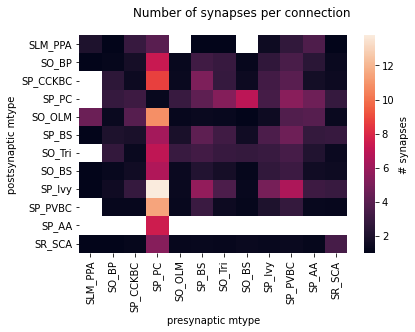

In [75]:
ax = seaborn.heatmap(model_mean)

fig = plt.gcf()
fig.suptitle('Number of synapses per connection', )

ax.set_xlabel('presynaptic mtype')
ax.set_ylabel('postsynaptic mtype')

ax.collections[0].colorbar.set_label("# synapses")

fig.show()

In [64]:
imc2r100 = list(f2['edges'])

In [67]:
# imc2r100 = list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'])
# np.size(imc2r100)

In [8]:
for i in range(1,19698045):
    target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]
    if mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][target_id]] == 'SP_PC':
        print(i)
        stop
        

73587


NameError: name 'stop' is not defined

In [51]:
i = 73587
target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]
source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
print(i,source_id,mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]],target_id,mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][target_id]])

73587 425 SP_PC 36 SP_PC


In [56]:
for i in range(73587,19698045):
    source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
    target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]
    if mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]] != 'SP_PC':
        print(i)
        stop
        

73638


NameError: name 'stop' is not defined

In [48]:
mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]]

'SP_PC'

In [10]:
source_id_anterior = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][0]
target_id_anterior = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][0]
count = 1
syns_mtypes = []
n_syns = []
# index = 0

# for i in imc2r100[1:]:
#     index = index + 1
for i in range(1,73587):
    source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
    target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]
    if source_id == source_id_anterior and target_id == target_id_anterior:
        count = count + 1
    else:
        n_syns.append(count)
        pre_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]]
        post_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][target_id]]
        syns_mtypes.append(pre_mtype + ':' + post_mtype)
        count = 1
#         syns_mtypes.append(proj_mtypes[index])
        source_id_anterior = source_id
        target_id_anterior = target_id     


In [11]:
pre_mtype + ':' + post_mtype

'SO_BP:SR_SCA'

In [31]:
n_synsperconn = []
n_syns = np.array(n_syns)ax = seaborn.heatmap(model_mean)

fig = plt.gcf()
fig.suptitle('Number of synapses per connection', )

ax.set_xlabel('presynaptic mtype')
ax.set_ylabel('postsynaptic mtype')

ax.collections[0].colorbar.set_label("# synapses")

fig.show()
unique_mtypes = []
for pre in mtypes:
    for post in mtypes:
        proj = '%s:%s' % (pre, post)

        if proj in syns_mtypes:
            n_synsperconn.append(np.rint(np.mean(n_syns[np.where(np.array(syns_mtypes)==proj)[0]])))
            if proj not in unique_mtypes:
                unique_mtypes.append(proj)

In [32]:
unique_mtypes

['SLM_PPA:SLM_PPA',
 'SLM_PPA:SR_SCA',
 'SO_BP:SLM_PPA',
 'SO_BP:SR_SCA',
 'SO_BS:SLM_PPA',
 'SO_BS:SR_SCA',
 'SO_OLM:SLM_PPA',
 'SO_OLM:SR_SCA',
 'SO_Tri:SR_SCA',
 'SP_BS:SLM_PPA',
 'SP_BS:SR_SCA',
 'SP_CCKBC:SR_SCA',
 'SP_Ivy:SLM_PPA',
 'SP_Ivy:SR_SCA',
 'SP_PC:SR_SCA',
 'SP_PVBC:SR_SCA',
 'SR_SCA:SLM_PPA',
 'SR_SCA:SR_SCA']

In [33]:
n_synsperconn = []
n_syns = np.array(n_syns)

for proj in unique_mtypes:
    n_synsperconn.append(np.rint(np.mean(n_syns[np.where(np.array(syns_mtypes)==proj)[0]])))


In [34]:
pre_mtypes = []
post_mtypes = []
for proj in unique_mtypes:
    split = proj.split(sep=':')
    pre_mtypes.append(split[0])
    post_mtypes.append(split[1])

In [35]:
synsPerConn = {}
synsPerConn['pre'] = pre_mtypes
synsPerConn['post'] = post_mtypes
synsPerConn['proj'] = unique_mtypes
synsPerConn['n_syns'] = n_synsperconn

In [36]:
synsPerConn = pd.DataFrame(synsPerConn)
synsPerConn

,pre,post,proj,n_syns
0,SLM_PPA,SLM_PPA,SLM_PPA:SLM_PPA,4.0
1,SLM_PPA,SR_SCA,SLM_PPA:SR_SCA,2.0
2,SO_BP,SLM_PPA,SO_BP:SLM_PPA,6.0
3,SO_BP,SR_SCA,SO_BP:SR_SCA,1.0
4,SO_BS,SLM_PPA,SO_BS:SLM_PPA,2.0
5,SO_BS,SR_SCA,SO_BS:SR_SCA,2.0
6,SO_OLM,SLM_PPA,SO_OLM:SLM_PPA,4.0
7,SO_OLM,SR_SCA,SO_OLM:SR_SCA,2.0
8,SO_Tri,SR_SCA,SO_Tri:SR_SCA,1.0
9,SP_BS,SLM_PPA,SP_BS:SLM_PPA,2.0


In [37]:
import seaborn as sns

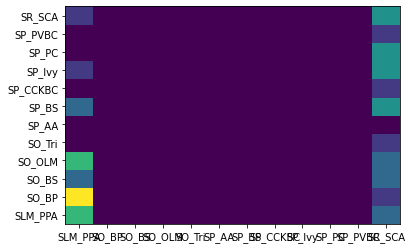

In [38]:
synsPerMtype = []
for pre in mtypes:
  line = []
  for post in mtypes:
    proj = '%s:%s' % (pre, post)
    if proj in unique_mtypes:
      line.append(float(synsPerConn[synsPerConn['proj']==proj]['n_syns']))
    else:
      line.append(0)
  synsPerMtype.append(line)

df = pd.DataFrame(synsPerMtype, index=mtypes, columns=mtypes)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

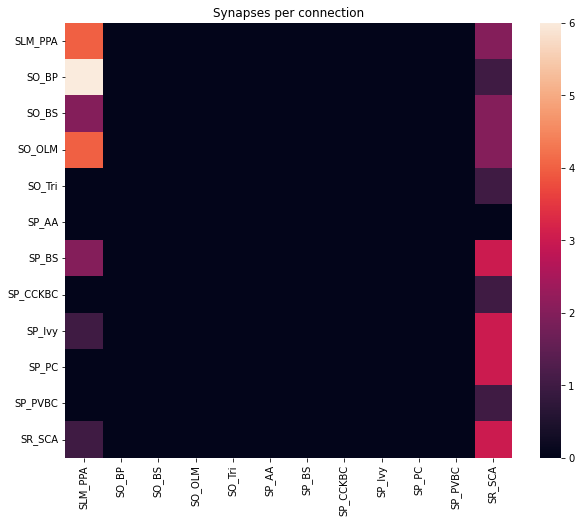

In [39]:
plt.figure(figsize=(10,8))
plt.title('Synapses per connection')
ax = sns.heatmap(df)

O código abaixo pode ser utilizado para importar o número de sinapses com mais detalhe!

In [ ]:
#synapses = []

#for i in imc2r100[1:1000]:
#  pre = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
#  post = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
  
#  syn = '%s:%s' % (pre, post)

#  synapses.append(syn)

In [ ]:
#synapses_ids, number_synapses = np.unique(synapses, return_counts=True)

In [ ]:
#number_synapses

array([ 1,  1,  2,  1,  1,  2,  2,  1,  2,  2,  2,  1,  1,  3,  4,  3,  2,
        1,  1,  4,  6,  2,  2,  2,  4,  5,  4,  7,  4,  2,  4,  2,  2,  3,
        2,  1,  1,  1,  2,  1,  3,  2,  1, 10,  2,  3,  2,  1,  3,  4,  2,
        3,  1,  3,  3,  2,  1,  1,  2,  2,  2,  4,  3,  5,  2,  3,  1, 11,
       34, 18, 27, 17, 10,  6, 36, 19, 15, 16, 18, 10, 15, 12, 14, 61, 31,
       48, 47, 10, 27, 32, 38,  5, 38,  1,  1,  3,  4,  1,  3,  6,  9,  3,
        3,  2,  2,  1,  1,  1,  3,  2,  2,  2,  1,  1,  5,  1,  4,  3,  8,
        3,  1,  2,  1,  3,  2,  2,  2,  1,  2,  5,  1,  3,  1,  1,  3,  2,
        1,  2,  9,  2,  2,  2,  1,  3,  1,  9,  4,  2,  2,  1,  1,  2,  1,
        2,  2,  1,  3,  1,  5,  2,  3,  3,  2,  4,  4,  1,  1,  2,  2,  4,
        1,  3,  2,  2,  3,  4,  2,  2,  2,  3])

1*) cp from data to sim (ok)

2º) run and compare (erro no colab)

3 - testar os mods criando uma conexão para cada par de mtype se existe na tabela de 47 (criado, mas preciso pega os gids)

4 - conectar todos os 531 usando os .h5 do BBP e rezar